# Clase 5, usando datos de acciones

Vamos a aprender a descargar datos historicos dela bolsa de valores y aplicar los conceptos que hemos visto 

- Leer archivos CSV
- Descargar datos historicos
- Obtener estadísticos básicos

## Descargar datos de manera remota

En esta clase estaremos usando yahoo para descargar datos

In [1]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


## Obtener datos diarios, tesla y apple

In [11]:
# Ejemplo yahoo
# https://finance.yahoo.com
df = yf.download(["AAPL",'TSLA'], start="2017-01-01", end="2024-01-25")['Close']
df.head()

[*********************100%%**********************]  2 of 2 completed


,AAPL,TSLA
Date,,
2017-01-03,29.037500,14.466000
2017-01-04,29.004999,15.132667
2017-01-05,29.152500,15.116667
2017-01-06,29.477501,15.267333
2017-01-09,29.747499,15.418667


In [16]:
#plt.figure(figsize=(8,8))
#plt.plot(df['AAPL'])
#plt.title('Apple')
#plt.grid()

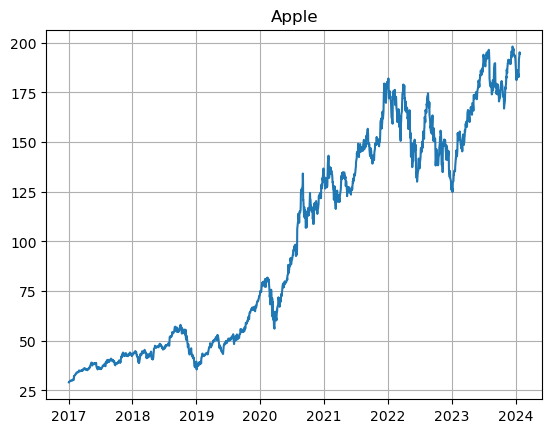

In [14]:
# Gráficamos los precios de cierre
plt.plot(df['AAPL'])
plt.title('Apple')
plt.grid()

In [18]:
# Ejemplo con acciónes de la bolsa mexicana, siempre usamos .MX
# Bajamos la acción de Banorte y Wal-Mart de México,
df = yf.download(["GFNORTEO.MX",'WALMEX.MX'], start="2017-01-01", end="2024-01-25")['Close']
df.head()

[*********************100%%**********************]  2 of 2 completed


,GFNORTEO.MX,WALMEX.MX
Date,,
2017-01-02,102.300003,37.049999
2017-01-03,101.220001,37.680000
2017-01-04,99.949997,37.750000
2017-01-05,100.139999,37.410000
2017-01-06,97.389999,36.529999


### Grafique las acciones de Mexico

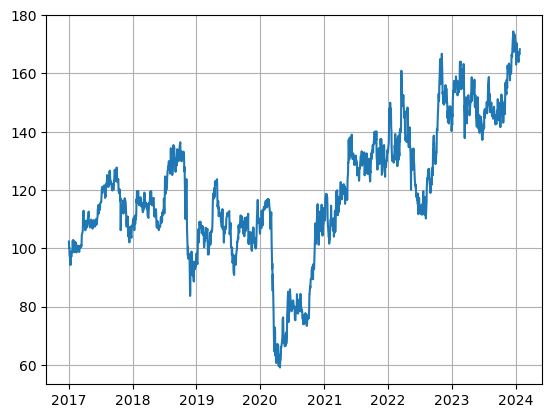

In [19]:
plt.plot(df['GFNORTEO.MX'])
plt.grid()

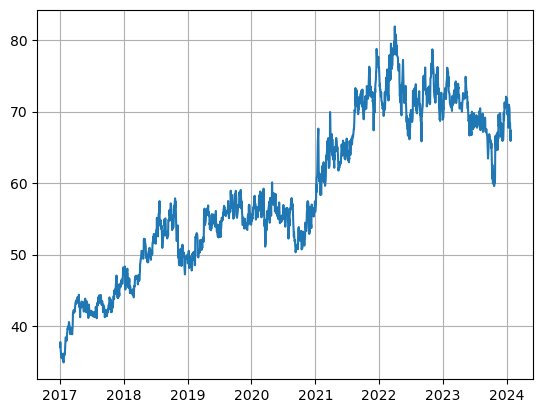

In [20]:
plt.plot(df['WALMEX.MX'])
plt.grid()

Vamos a sacar el rendimiento, en este caso es diario

$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$


In [27]:
# Aplicamos la funcion .shift
(df - df.shift())/df.shift()

,GFNORTEO.MX,WALMEX.MX
Date,,
2017-01-02,NaN,NaN
2017-01-03,-0.010557,0.017004
2017-01-04,-0.012547,0.001858
2017-01-05,0.001901,-0.009007
2017-01-06,-0.027462,-0.023523
...,...,...
2024-01-18,-0.006242,-0.007275
2024-01-19,0.020550,0.001905
2024-01-22,-0.005198,-0.035986


In [24]:
rt = df.pct_change()
rt.head()

,GFNORTEO.MX,WALMEX.MX
Date,,
2017-01-02,NaN,NaN
2017-01-03,-0.010557,0.017004
2017-01-04,-0.012547,0.001858
2017-01-05,0.001901,-0.009007
2017-01-06,-0.027462,-0.023523


In [28]:
# Eliminamos los NA (que es el primer dia)
rt = rt.dropna()
rt

,GFNORTEO.MX,WALMEX.MX
Date,,
2017-01-03,-0.010557,0.017004
2017-01-04,-0.012547,0.001858
2017-01-05,0.001901,-0.009007
2017-01-06,-0.027462,-0.023523
2017-01-09,-0.005955,-0.017520
...,...,...
2024-01-18,-0.006242,-0.007275
2024-01-19,0.020550,0.001905
2024-01-22,-0.005198,-0.035986


In [29]:
# Estadísticos básicos de nuestro data framert['WALMEX.MX'].describe()

count    1776.000000
mean        0.000457
std         0.015864
min        -0.083225
25%        -0.009134
50%         0.000372
75%         0.009835
max         0.068265
Name: WALMEX.MX, dtype: float64

<Axes: >

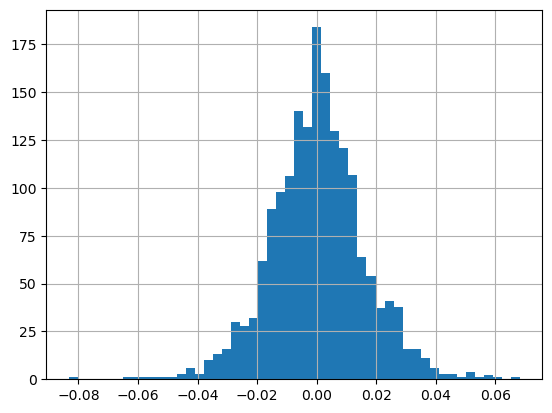

In [30]:
# Histograma de los rendimientos
rt['WALMEX.MX'].hist(bins=50)

### Banorte

- Rendimiento aritmético
- Rendimiento geométrico
- Comprobar que rendimiento geométrico cuadre con aritético
- Rendimiento usando precio final y precio inicial


Recordando que los rendimientos son: 


$r_a = (\prod_{i=1}^{T}(1+r_i)) - 1$

$\bar{r}_g=\left[\prod_{i=1}^{T}(1+r_i)\right]^{1/T}-1.$

Crea una función para calcular los mismos

In [33]:
# Aritmético
primero_banorte=df['GFNORTEO.MX'].iloc[0]
ultimo_banorte=df['GFNORTEO.MX'].iloc[-1]

#ultimo_banorte/primero_banorte-1
(ultimo_banorte-primero_banorte)/primero_banorte

0.6452589690876035

In [36]:
(1+rt['GFNORTEO.MX']).prod()-1

0.6452589690876005

In [37]:
def rendimiento_aritmetico(x):
    return (1+x).prod()-1

In [38]:
rendimiento_aritmetico(rt['GFNORTEO.MX'])

0.6452589690876005

In [39]:
# Geometrico
rg = (1+rt['GFNORTEO.MX']).prod()**(1/len(rt))-1
rg

0.0002803871614063258

In [40]:
(1+rg)**(len(rt))-1

0.645258969087771

Recordando, con el rendimiento geometrico puedo obteener esto:

$$S_t = S_0 * (1 + rg) ^T$$

¿como se vería la gráfica de Banorte partiendo del rendimiento geometrico hasta el día de hoy?

In [41]:
ultimo_banorte

168.30999755859375

In [42]:
primero_banorte * (1+rg) ** (len(rt))

168.3099975586109

In [43]:
precios = [primero_banorte]
for i in range(len(rt)):
    precios.append(primero_banorte*(1+rg)**i)

In [44]:
df['geometrico_banorte']=precios

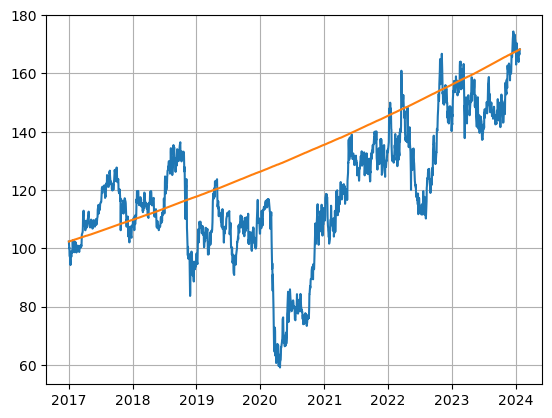

In [45]:
plt.plot(df['GFNORTEO.MX'])
plt.plot(df['geometrico_banorte'])
plt.grid()

###  Walmex

- Rendimiento aritmético
- Rendimiento geométrico
- Comprobar que rendimiento geométrico cuadre con aritmético
- Rendimiento usando precio final y precio inicial

In [46]:
# Aritmético
rendimiento_aritmetico(rt['WALMEX.MX'])

0.8016194702976149

In [50]:
# Geometrico
rg_walmex=(1+rt['WALMEX.MX']).prod() ** (1/len(rt)) - 1
rg_walmex

0.00033152226463517565

$$Inicial * (1+geometrico)^n  = Final$$

In [49]:
# Comprobar rendimiento geométrico
primero_walmex = df['WALMEX.MX'].iloc[0]
ultimo_walmex = df['WALMEX.MX'].iloc[-1]
(primero_walmex, ultimo_walmex)

(37.04999923706055, 66.75)

In [51]:
primero_walmex * (1+rg_walmex)**(len(rt))

66.75000000001056

In [56]:
precios_walmex = [primero_walmex]
for i in range(len(rt)):
    precios_walmex.append(primero_walmex*(1+rg_walmex)**i)

In [57]:
df['precios_walmex']=precios_walmex

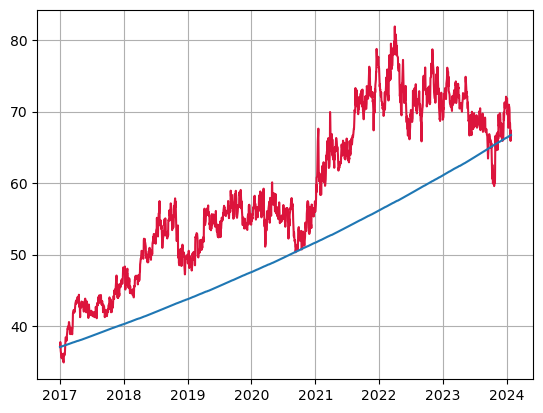

In [59]:
# Grafique la acción con el rendimiento geometrico 
plt.plot(df['WALMEX.MX'], color='crimson')
plt.plot(df['precios_walmex'])
plt.grid()

### Riesgo y rendimiento, concepto 

Calcule el riesgo y volatilidad para estos tickes: 

['AAPL', 'AMZN', 'GOOGL', 'COST', 'MSFT']



¿Hay alguna relación entre el riesgo y el rendimiento? Justifique su respuesta

In [60]:
df = yf.download(["AAPL",'AMZN','GOOGL','COST','MSFT'], start="2017-01-01", end="2024-01-25")['Close']
df

[*********************100%%**********************]  5 of 5 completed


,AAPL,AMZN,COST,GOOGL,MSFT
Date,,,,,
2017-01-03,29.037500,37.683498,159.729996,40.400501,62.580002
2017-01-04,29.004999,37.859001,159.759995,40.388500,62.299999
2017-01-05,29.152500,39.022499,162.910004,40.651001,62.299999
2017-01-06,29.477501,39.799500,162.830002,41.260502,62.840000
2017-01-09,29.747499,39.846001,160.970001,41.359001,62.639999
...,...,...,...,...,...
2024-01-18,188.630005,153.500000,687.309998,143.479996,393.869995
2024-01-19,191.559998,155.339996,694.969971,146.380005,398.670013
2024-01-22,193.889999,154.779999,692.510010,145.990005,396.510010


In [63]:
rt = df.pct_change().dropna()

In [65]:
rt.mean() * 252

AAPL     0.315286
AMZN     0.258892
COST     0.233336
GOOGL    0.228328
MSFT     0.304623
dtype: float64

In [70]:
#rt.var() * 252

In [69]:
import numpy as np
rt.std() * np.sqrt(252)

AAPL     0.300458
AMZN     0.336013
COST     0.228795
GOOGL    0.293985
MSFT     0.283684
dtype: float64

Ojo, para convertir a base anual 

$$E[r_a]=12E[r_m]=252E[r_d]=52E[r_w],\text{ y}$$

$$\sigma_{r_a}=\sqrt{12}\sigma_{r_m}=\sqrt{252}\sigma_{r_d}=\sqrt{52}\sigma_{r_w}$$

### Mostrar regresión 

In [71]:
tickers = ['AAPL', 'AMZN', 'GOOGL', 'COST', 'MSFT', 'TSLA', 'BRK-A', 'NVDA']
df = yf.download(tickers, start="2017-01-01", end="2024-01-25")['Close']
df

[*********************100%%**********************]  8 of 8 completed


,AAPL,AMZN,BRK-A,COST,GOOGL,MSFT,NVDA,TSLA
Date,,,,,,,,
2017-01-03,29.037500,37.683498,245850.0,159.729996,40.400501,62.580002,25.502501,14.466000
2017-01-04,29.004999,37.859001,246600.0,159.759995,40.388500,62.299999,26.097500,15.132667
2017-01-05,29.152500,39.022499,244852.0,162.910004,40.651001,62.299999,25.434999,15.116667
2017-01-06,29.477501,39.799500,245394.0,162.830002,41.260502,62.840000,25.775000,15.267333
2017-01-09,29.747499,39.846001,243111.0,160.970001,41.359001,62.639999,26.820000,15.418667
...,...,...,...,...,...,...,...,...
2024-01-18,188.630005,153.500000,549477.0,687.309998,143.479996,393.869995,571.070007,211.880005
2024-01-19,191.559998,155.339996,556710.0,694.969971,146.380005,398.670013,594.909973,212.190002
2024-01-22,193.889999,154.779999,558316.0,692.510010,145.990005,396.510010,596.539978,208.800003


In [72]:
rt = df.pct_change().dropna()

In [74]:
import pandas as pd
df = pd.DataFrame({
    'rendimientos':rt.mean() * 252,
    'volatilidades':rt.std() * np.sqrt(252)
})
df

,rendimientos,volatilidades
AAPL,0.315286,0.300458
AMZN,0.258892,0.336013
BRK-A,0.139898,0.201143
COST,0.233336,0.228795
GOOGL,0.228328,0.293985
MSFT,0.304623,0.283684
NVDA,0.575769,0.498294
TSLA,0.560139,0.603346


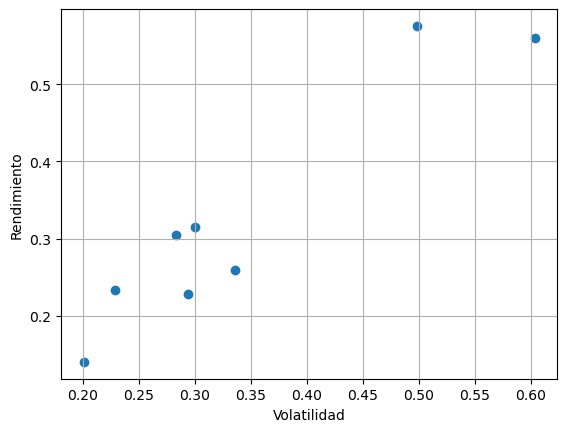

In [77]:
plt.scatter(df['volatilidades'], df['rendimientos'])
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.grid()

Text(0, 0.5, '$E[r]$')

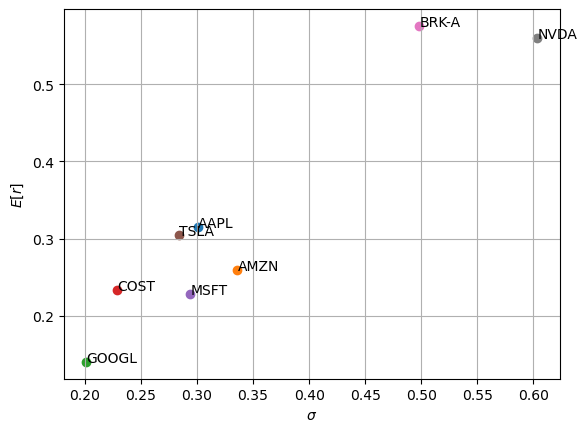

In [79]:
for i in range(len(df)):
    flag_df=df.iloc[i]
    name = tickers[i]
    plt.scatter(flag_df['volatilidades'], flag_df['rendimientos'])
    plt.text(flag_df['volatilidades'], flag_df['rendimientos'], name)
plt.grid()
plt.xlabel('$\sigma$')
plt.ylabel('$E[r]$')